In [1]:
from fastai.vision import *
from fastai import *
import cv2

In [12]:
bs = 8  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
PATH = 'strive-mask-dataset'

In [13]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes) 

There are  3 classes:
 ['bad_mask', 'mask', 'no_mask']


In [14]:
data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

C:\Users\User\anaconda3\envs\face_recog\lib\site-packages\torch\nn\functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
C:\Users\User\anaconda3\envs\face_recog\lib\site-packages\torch\nn\functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The defaul

There are 2408 training images and 602 validation images.


C:\Users\User\anaconda3\envs\face_recog\lib\site-packages\torch\nn\functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
C:\Users\User\anaconda3\envs\face_recog\lib\site-packages\torch\nn\functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The defaul

C:\Users\User\anaconda3\envs\face_recog\lib\site-packages\torch\nn\functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
C:\Users\User\anaconda3\envs\face_recog\lib\site-packages\torch\nn\functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The defaul

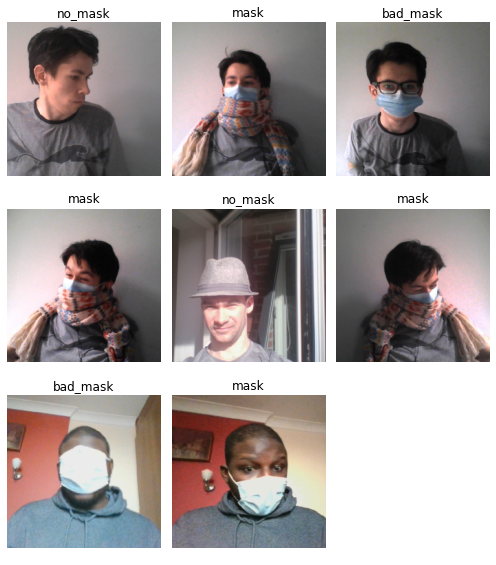

In [15]:
data.show_batch(rows=3, figsize=(7,8))

In [16]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to C:\Users\User/.cache\torch\hub\checkpoints\resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [17]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.014806,0.507769,0.789037,07:48
1,0.771534,0.581129,0.789037,08:05
2,0.693881,0.428958,0.838870,08:08
3,0.574313,0.375071,0.868771,08:13
4,0.527731,0.311356,0.870432,08:02
5,0.396625,0.240886,0.906977,07:57
6,0.410201,0.223553,0.916944,07:58
7,0.366309,0.172684,0.931894,07:59
8,0.253083,0.167883,0.938538,07:58
9,0.290251,0.183388,0.928571,08:56


It is a bad_mask


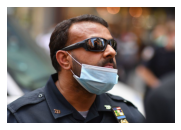

In [8]:
path = './' #The path of your test image
img = open_image(get_image_files(path)[0])
pred_class,pred_idx,outputs = learn.predict(img)
img.show()
print ("It is a", pred_class)

In [18]:
#learn.export(fname='export.pkl', pickle_module=pickle, pickle_protocol=2)
learn.export(os.path.abspath('./export.pkl'))

In [2]:
path = './'
model_inf = load_learner(path, 'export.pkl')


In [3]:
import cv2


In [94]:
model = load_learner('./', 'export1.pkl')
face_classifier = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

cap = cv2.VideoCapture(0)
#cap.set(cv2.CAP_PROP_FPS, 10)
while (cap.isOpened()):
    _,frame = cap.read()
    frame1 = frame.copy()

    gray_frame = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    face_detect = face_classifier.detectMultiScale(gray_frame)
    #frame_cp = frame1[y:y+h+20, x:x+w+20]
        
    t = torch.tensor(np.ascontiguousarray(np.flip(frame1, 2)).transpose(2,0,1)).float()/255
    img = Image(t)


    prediction, idx, probability = model.predict(img)
    
    if str(prediction) == 'no_mask':
        cv2.rectangle(frame,(15,20),(25,30),(0,255,0),-1)
    #prediction, idx, probability = model.predict(Image(pil2tensor(frame, np.float32).div(150)))
        cv2.putText(frame, f'{prediction}', (20,20), cv2.FONT_ITALIC, 1, (0,0,0), 2, cv2.LINE_AA)
        for x,y,w,h in face_detect:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),3)
    
    if str(prediction) == 'mask':
        cv2.rectangle(frame,(100,100),(200,125),(0,255,0),-1)
    #prediction, idx, probability = model.predict(Image(pil2tensor(frame, np.float32).div(150)))
        cv2.putText(frame, f'{prediction}', (100,100), cv2.FONT_ITALIC, 1, (0,0,0), 2, cv2.LINE_AA)
        for x,y,w,h in face_detect:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),3)
            
    if str(prediction) == 'bad_mask':
        cv2.rectangle(frame,(15,20),(25,30),(0,255,0),-1)
    #prediction, idx, probability = model.predict(Image(pil2tensor(frame, np.float32).div(150)))
        cv2.putText(frame, f'{prediction}', (20,20), cv2.FONT_ITALIC, 1, (0,0,0), 2, cv2.LINE_AA)
        for x,y,w,h in face_detect:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),3)

        #cv2.rectangle(
        #        img=frame,
        #        pt1=(x, y),
        #        pt2=(x+w, y+h),
        #        color=(128, 128, 0),
        #        thickness=2,
        #    )

    cv2.imshow('test',frame)

    key = cv2.waitKey(150)
    if key == ord('q') or key == 27:
        break
cap.release()
cv2.destroyAllWindows()
